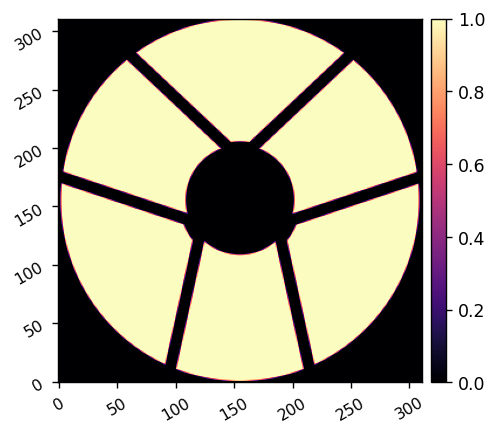

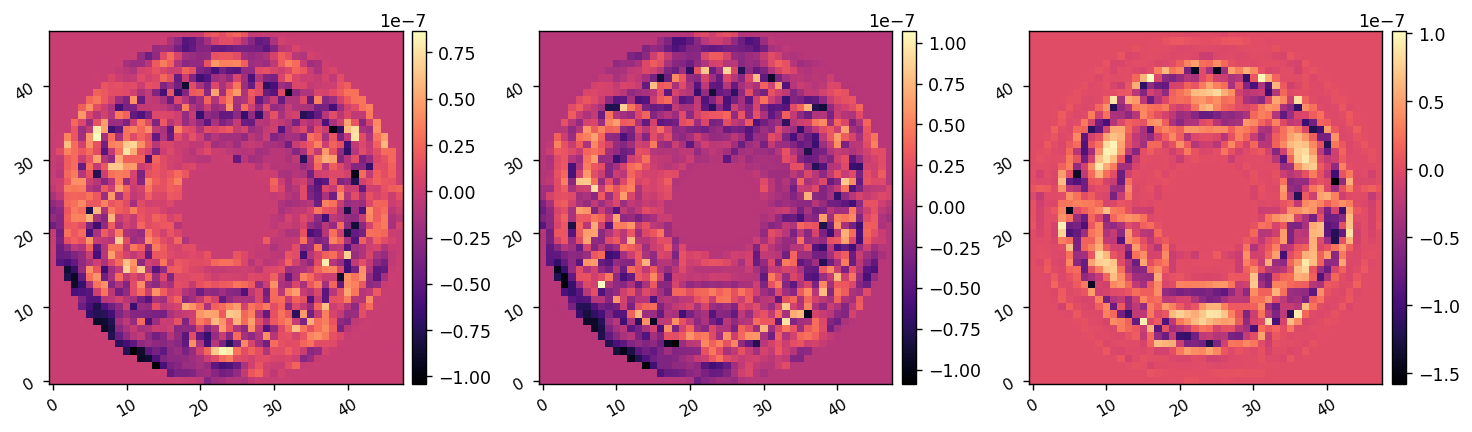

In [2]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from IPython.display import clear_output, display
import time
from pathlib import Path
import copy

import proper
proper.prop_use_fftw(DISABLE=False)

import roman_phasec_proper

import cgi_phasec_poppy as cgi
import cgi_phasec_poppy.imshows as imshows
from cgi_phasec_poppy.imshows import *
import ray

from importlib import reload

data_dir = Path('/groups/douglase/kians-data-files/disk-processing')
data_dir = Path('/npool/nvme/kianmilani/disk-data')

pupil = fits.getdata(roman_phasec_proper.data_dir + '/hlc_20190210b/pupil.fits')
npup = pupil.shape[0]
imshow1(pupil)

dm1_best = fits.getdata(roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm1.fits')
dm2_best = fits.getdata(roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm2.fits')
imshow3(dm1_best, dm2_best, dm1_best-dm2_best)

wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

psf_pixelscale_mas = 20.8*u.mas/u.pix
psf_pixelscale_lamD = psf_pixelscale_mas.value / mas_per_lamD.value

polaxis = 2

iwa = 2.8
owa = 9.7

In [12]:
# proper.prop_use_ffti()
proper.prop_use_fftw()

5689

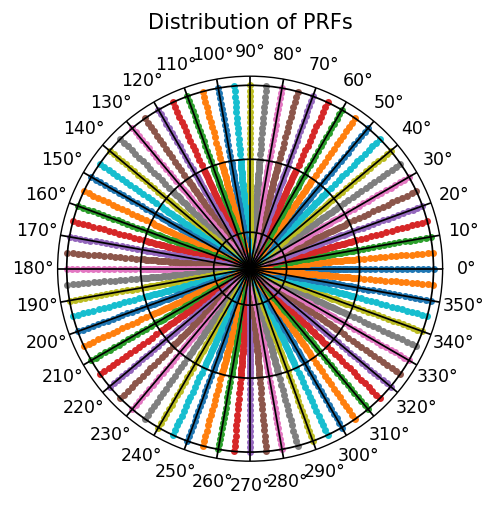

In [3]:
wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

npsf = 64
psf_pixelscale = 13e-6
psf_pixelscale_lamD = 500/575 * 1/2
psf_pixelscale_mas = psf_pixelscale_lamD*mas_per_lamD/u.pix

iwa = 3
owa = 9

# Create the sampling grid the PSFs will be made on
sampling1 = 0.1
sampling2 = 0.2
sampling3 = psf_pixelscale_lamD
offsets1 = np.arange(0,iwa+1,sampling1)
offsets2 = np.arange(iwa+1,owa,sampling2)
offsets3 = np.arange(owa,15+sampling3,sampling3)

r_offsets = np.hstack([offsets1, offsets2, offsets3])
nr = len(r_offsets)
r_offsets_mas = r_offsets*mas_per_lamD
# display(nr, r_offsets)

sampling_theta = 5
thetas = np.arange(0,360,sampling_theta)*u.deg
nth = len(thetas)
# display(nth, thetas)

psfs_required = (nr-1)*nth + 1
display(psfs_required)

# Plotting field angles
theta_offsets = []
for r in r_offsets[1:]:
    theta_offsets.append(thetas.to(u.radian).value)
theta_offsets = np.array(theta_offsets)
theta_offsets.shape

fig = plt.figure(dpi=125, figsize=(4,4))

ax1 = plt.subplot(111, projection='polar')
ax1.plot(theta_offsets, r_offsets[1:], '.', )
ax1.set_yticklabels([])
ax1.set_rticks([iwa, owa, max(r_offsets)],)  # Less radial ticks
ax1.set_rlabel_position(55)  # Move radial labels away from plotted line
ax1.set_thetagrids(thetas[::2].value)
ax1.grid(axis='x', visible=True, color='black', linewidth=1)
ax1.grid(axis='y', color='black', linewidth = 1)
ax1.set_title('Distribution of PRFs', va='bottom')
ax1.set_axisbelow(False)

In [4]:
r_offsets

array([ 0.        ,  0.1       ,  0.2       ,  0.3       ,  0.4       ,
        0.5       ,  0.6       ,  0.7       ,  0.8       ,  0.9       ,
        1.        ,  1.1       ,  1.2       ,  1.3       ,  1.4       ,
        1.5       ,  1.6       ,  1.7       ,  1.8       ,  1.9       ,
        2.        ,  2.1       ,  2.2       ,  2.3       ,  2.4       ,
        2.5       ,  2.6       ,  2.7       ,  2.8       ,  2.9       ,
        3.        ,  3.1       ,  3.2       ,  3.3       ,  3.4       ,
        3.5       ,  3.6       ,  3.7       ,  3.8       ,  3.9       ,
        4.        ,  4.2       ,  4.4       ,  4.6       ,  4.8       ,
        5.        ,  5.2       ,  5.4       ,  5.6       ,  5.8       ,
        6.        ,  6.2       ,  6.4       ,  6.6       ,  6.8       ,
        7.        ,  7.2       ,  7.4       ,  7.6       ,  7.8       ,
        8.        ,  8.2       ,  8.4       ,  8.6       ,  8.8       ,
        9.        ,  9.43478261,  9.86956522, 10.30434783, 10.73

In [5]:
5689*17/3600

26.864722222222223

In [12]:
4249*17/3600

20.064722222222223

In [15]:
nlam = 7
lam0 = 0.575
bandwidth = 0.1
minlam = lam0 * (1 - bandwidth/2)
maxlam = lam0 * (1 + bandwidth/2)
lam_array = np.linspace( minlam, maxlam, nlam )

dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm1.fits' )
dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm2.fits' )

options = {'cor_type':'hlc', # change coronagraph type to correct band
           'final_sampling_lam0':psf_pixelscale_lamD, 
           'source_x_offset':0,
           'source_y_offset':0,
           'use_fpm':1,
           'use_field_stop':1,
           'use_errors':1,
           'use_lens_errors':1,
           'use_hlc_dm_patterns':0,
           'use_dm1':1, 'dm1_m':dm1, 
           'use_dm2':1, 'dm2_m':dm2,
           'polaxis':polaxis,   
          }



In [13]:
lam_array = np.array([0.575])

Lambda = 5.6542E-07   Throughput = 1.00Lambda = 5.7500E-07   Throughput = 1.00Lambda = 5.8458E-07   Throughput = 1.00Lambda = 5.5583E-07   Throughput = 1.00Lambda = 5.4625E-07   Throughput = 1.00




Lambda = 5.9417E-07   Throughput = 1.00Lambda = 6.0375E-07   Throughput = 1.00

Applying lens
Applying lensApplying lens

Applying lensApplying lensApplying lensApplying lens



Propagating to secondaryPropagating to secondary

Propagating to secondary
Propagating to secondary
Propagating to secondary
Propagating to secondary
Propagating to secondary
Applying lensApplying lens

Applying lens
Applying lens
Applying lens
Applying lens
Applying lens
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to M3
Propagating to M3
Propagating to M3
Propagating to M3
Propagating to M3
Propagating to M3
Applying lens
Applying lens
Applying lensApplying lens

Applying l

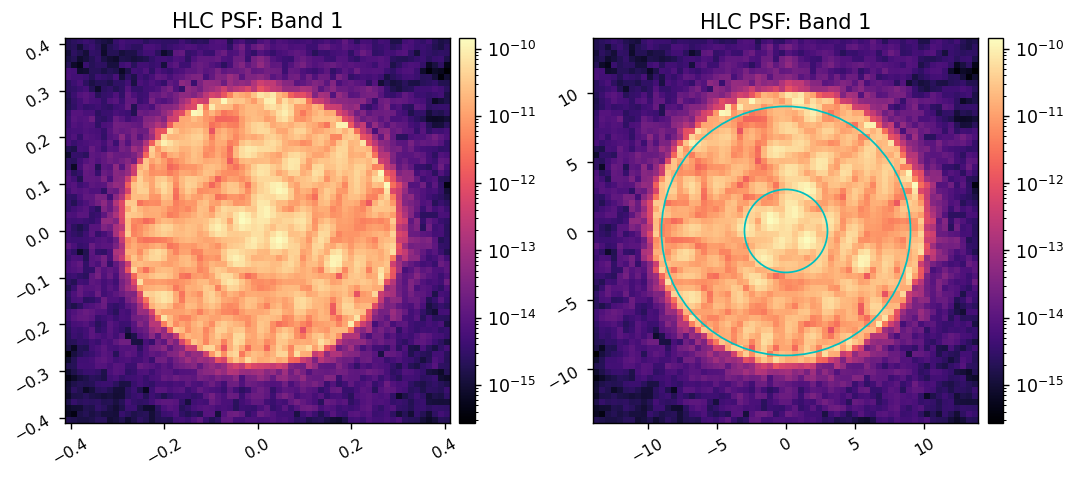

In [16]:
(wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=False, PASSVALUE=options)

psfs = np.abs(wfs)**2
psf_bb = np.sum(psfs, axis=0)/nlam
psf_pixelscale_m = pxscls_m[0]*u.m/u.pix

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow2(psf_bb, psf_bb, 'HLC PSF: Band 1', 'HLC PSF: Band 1',
               lognorm1=True, lognorm2=True, 
               pxscl1=psf_pixelscale_m.to(u.mm/u.pix), pxscl2=psf_pixelscale_lamD, patches2=patches)

In [21]:
r_offsets[0]

0.0

(64, 64)


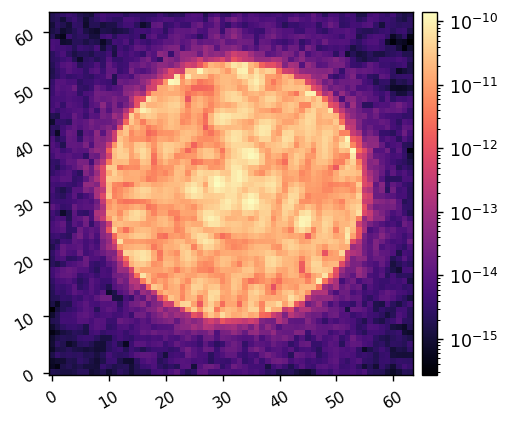

0 19.650831699371338
(64, 64)


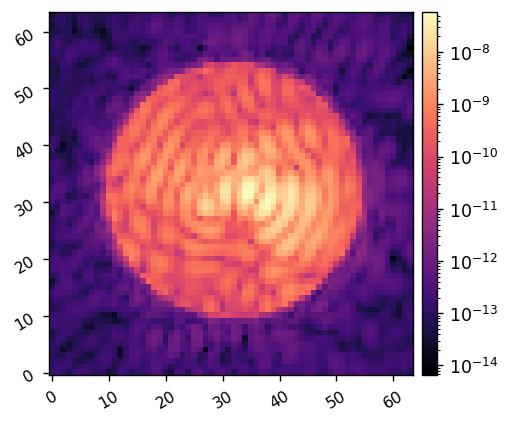

1 38.82345414161682


KeyboardInterrupt: 

In [27]:
psfs_array = np.zeros( shape=( (len(r_offsets)-1)*len(thetas) + 1, npsf,npsf) )

count = 0
start = time.time()
for i,r in enumerate(r_offsets): 
    for j,th in enumerate(thetas):
        xoff = r*np.cos(th)
        yoff = r*np.sin(th)
        options.update( {'source_x_offset':xoff.value, 'source_y_offset':yoff.value} )
    
        (wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=True, PASSVALUE=options)

        psfs = np.abs(wfs)**2
        psf = np.sum(psfs, axis=0)/nlam
        
        print(psf.shape)
        imshow1(psf, lognorm=True)
        
        print(count, time.time()-start)
        psfs_array[count] = psf
        count += 1

        if r<r_offsets[1]: 
            break # skip first set of PSFs if radial offset is 0 at the start
        

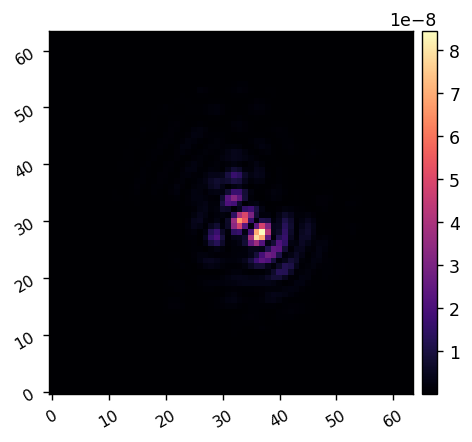

In [23]:
psfs = fits.getdata(data_dir/'psfs'/f'hlc_band1_psfs_polaxis-2_20240418.fits')
imshow1(psfs[60])